# MCS precipitation statistics


In [8]:
import numpy as np
import os
import glob 
import random 

import matplotlib.pyplot as plt
import cartopy
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

import scipy
from scipy import ndimage
from scipy.stats import skew
from scipy.ndimage import label, generate_binary_structure
import matplotlib.pyplot as plt

from netCDF4 import Dataset
from collections import Counter 

import pandas as pd 

In [65]:
# read in statistics for one month 
file = '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tracks/201708_tracks.nc'
def read_in_netcdf(file):
    ds = xr.open_dataset(file)
    stats = ds.to_dataframe()
    return stats

In [66]:
stats = read_in_netcdf(file)

In [67]:
# add new dataframe to current one 
file2= '/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/tracks/201608_tracks.nc'
df= read_in_netcdf(file2)
stats.append(df)


,date,time,lon,lat,PREC_mean,PREC_max,PREC_min,area,skew
ID,,,,,,,,,
7,20170801,1230,30.144594,75.495956,9.975197,15.294099,7.086372,3956.078212,0.543540
7,20170801,2230,32.579533,74.223152,15.149220,38.801167,7.011247,15523.253799,0.843348
7,20170802,1430,27.377781,87.183327,12.404141,29.119394,7.854423,3952.576171,1.554035
7,20170802,1500,27.832500,92.294174,13.751048,54.508476,7.050000,13119.566764,2.183084
7,20170802,1530,27.350000,87.263107,12.730351,37.800003,7.050000,6699.108096,2.099165
7,20170802,1600,27.391178,87.197052,12.357388,30.532213,7.002930,7465.075765,1.553659
7,20170802,1630,27.306177,87.498314,15.499947,42.808884,7.028215,9777.936063,1.448900
7,20170802,1700,27.395237,86.819046,13.641740,33.191288,7.130544,4610.610201,1.379792
12,20170803,1500,28.317188,81.545319,12.360316,24.347271,7.068916,6966.060408,1.100221


In [46]:
# average get average values for entire MCS subset
mean_values= stats.mean(axis= 0)
mean_values

date         2.017081e+07
time         1.400769e+03
lon          2.946814e+01
lat          8.862515e+01
PREC_mean    1.338637e+01
PREC_max     3.435280e+01
PREC_min     7.078675e+00
area         1.461640e+04
skew         1.420062e+00
dtype: float64

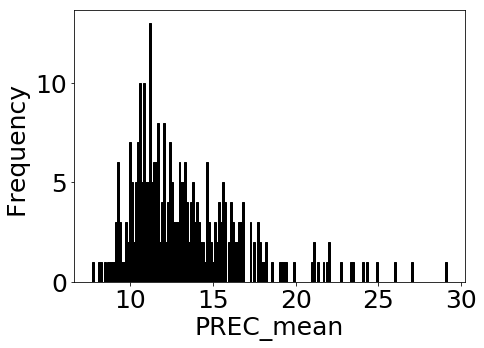

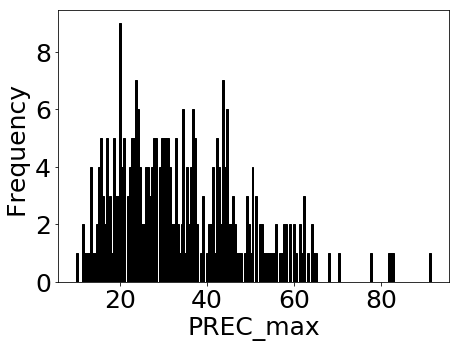

In [64]:
# plot PDF of parameter in subset 

for i in stats.columns[4:6]:
    plt.figure(figsize= (7,5)  )
    plt.hist(stats[i], bins = int(180/1),color = 'black', edgecolor = 'black')
    plt.rcParams.update({'font.size': 25})
    plt.ylabel('Frequency ')
    plt.xlabel(i)
    plt.show()


In [68]:
# calculate lifetime of MCS 

In [69]:
# plot track of MCS 